In [1]:
from tqdm import tqdm
import glob
import numpy as np
from uuid import UUID
import lz4

from pit30m.data.partitions import PreProcessPartition, GeoPartition, QueryBasePartition
from pit30m.camera import CamName
from pit30m import LogReader

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
with open("../pit30m/all_logs.txt", "r") as f:
    logs = f.readlines()
    logs = sorted([x.strip() for x in logs])

# logs = []
# for f in glob.glob("/home/julieta/pit30m_partitions/utm_poses_dense/to_hide/*"):
# print(logs)
#     logs.append(f.split("/")[-1][:-4])

logs = logs[:50]
print(logs)

['00682fa6-2183-4a0d-dcfe-bc38c448090f', '006ce26a-cd92-4b90-ec10-454da73ede13', '009334fa-acb9-4813-c60c-1916c83974c8', '00a05077-a8f6-4f08-ee38-c7bc4e885611', '0106abc2-b689-464a-cfe4-9f6a00089733', '017be362-c6cf-47fe-e317-fdcf128ce85a', '01959149-0840-4eba-e0a0-53c6b2bb0f84', '01c3ae4e-2bb6-4bd1-efc9-bfb16e4bd1e3', '01d09d4c-329a-4952-f2ed-555aa76dab2c', '01e21524-2e61-4ea6-cf98-164bcb2d29ab', '01e86404-c224-4b10-d12e-9e2144626b3b', '020465aa-b3f0-4b8e-c6af-b535078fe30c', '020829cb-e2a3-4160-df19-8bd4682f1115', '0209f084-2efb-4acf-f2ce-e8f8a58c8b06', '021286dc-5fe5-445f-e5fa-f875f2eb3c57', '024e8e83-7778-496f-e3c4-dfd7c0875d2d', '025c3909-7fe4-4817-e386-5d2de975363a', '025e793e-e8eb-4c6d-e074-accb77dbe4d3', '027a633e-c9d0-4340-fa28-50bf842e6d2c', '0281c09f-836a-4cfa-dcbd-77f1349b6b96', '0308a5d9-6e4c-498f-e7ef-c75e8ae721af', '0330dec6-1dbe-44d8-e139-723f2b7be005', '03359966-92d2-44d5-df29-3f391645f9ab', '03709ebf-bcce-43c5-dd63-9170b2a74836', '037e11f7-2300-47ad-e41d-9d87c2ec218f',

In [3]:
log_readers = {}
for logid in logs:
    # log_readers[logid] = LogReader(f"s3://pit30m/{logid}/", index_version=1)
    log_readers[logid] = LogReader(
        f"s3://pit30m/{logid}/", 
        index_version=1, 
        # partitions=[PreProcessPartition.VALID, GeoPartition.TRAIN],
        partitions=[PreProcessPartition.VALID, GeoPartition.TEST, QueryBasePartition.QUERY],
    )

100%|██████████| 50/50 [00:00<00:00, 489.39it/s]


0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included so far
0 poses included

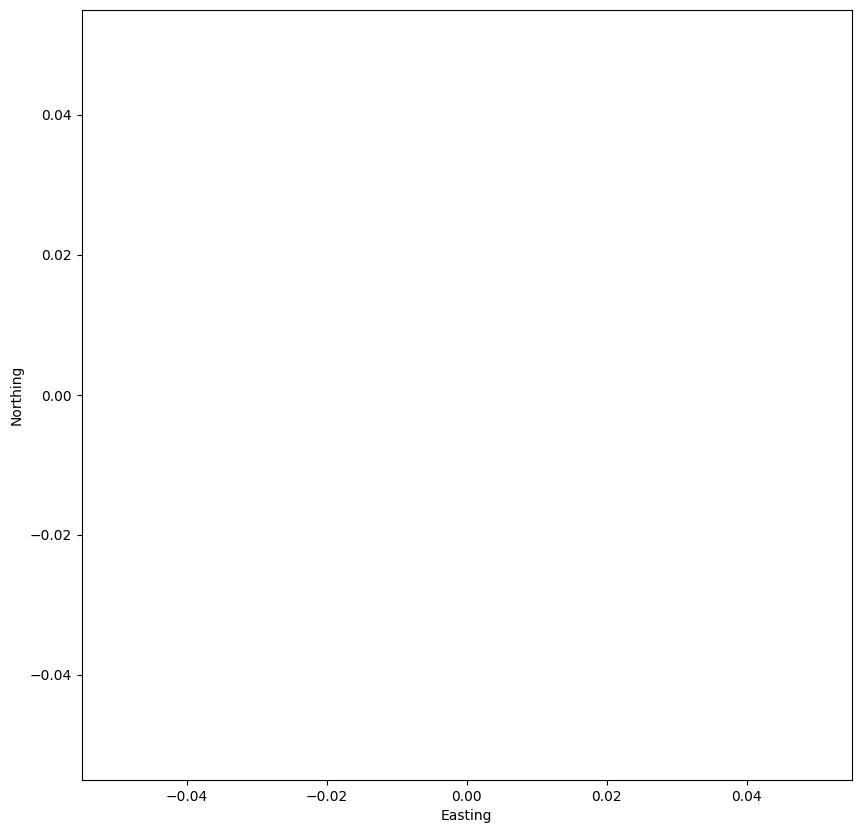

In [9]:
figsz = 20 // 2
fig = plt.figure(figsize=(figsz, figsz), dpi=100, facecolor='w', edgecolor='k')

included = 0
with_poses = []
for log_id, lr in tqdm(log_readers.items()):
    
    # camera index
    index = lr.get_cam_geo_index(CamName.MIDDLE_FRONT_WIDE, max_delta_s=0.2)
    utm_present = index["utm_present"]
    x = index["utm_x"][utm_present]
    y = index["utm_y"][utm_present]
    
    # # UTM poses with offsets from the maps 
    # valid, xyzs = lr.utm_poses_dense
    # xyzs = xyzs[valid]
    # x, y = xyzs[:, 0], xyzs[:, 1]
    # if len(x) > 0:
    #     print(xyzs[0])
    
    # This gives me 3_249 poses
    # pose_index = lr.continuous_pose_dense
    # x, y = pose_index[:, 2], pose_index[:, 3]
    
    # MRP dense, removing invalid, I get 2_530 poses
    # pose_index = lr.map_relative_poses_dense
    # pose_index = pose_index[pose_index["valid"]]
    # x, y = pose_index["x"], pose_index["y"]
     
    sc = plt.scatter(x, y, s=0.5, alpha=0.5)
    
    # if len(x) > 0:
    #     print(log_id, pose_index[0])
    #     print(pose_index["time"][0])
    #     with_poses.append(log_id)
    
    included += len(x)
    print(f"{included:_} poses included so far")
    
    # percent_hidden = 100 * hidden_in_log / len(utm)
    # if percent_hidden > 90: 
    #     print(f"{log_id} has {hidden_in_log:_} poses to hide ({percent_hidden:.2f}%)")

plt.axis("square")
plt.xlabel("Easting")
plt.ylabel("Northing")
print(f"Total included: {included:_}")
print(f"Total with poses: {len(with_poses)}")
print(with_poses)

In [7]:
xyzs

array([], shape=(0, 3), dtype=float64)

In [ ]:
submap_ids = sorted([UUID(bytes=x.ljust(16, b"\x00")) for x in np.unique(index["submap_id"])])
print(len(submap_ids))
print(submap_ids[:10])

NameError: name 'index' is not defined

In [ ]:
from typing import Iterable
from pathlib import Path
from joblib import Parallel, delayed
import pickle
from numpy.lib import recfunctions as rfn

def get_utm_poses_with_metadata(lr):
    pose_time, pose_valid, pose_xy = lr.utm_poses_dense
    time = rfn.unstructured_to_structured(pose_time[:, np.newaxis], names=["utm_time"])
    # assert np.all(np.diff(time["utm_time"]) >= 0), "Pose times are not sorted"
    valid = rfn.unstructured_to_structured(pose_valid[:, np.newaxis], names=["utm_valid"])
    # assert len(valid) == len(pose_valid)
    xys = rfn.unstructured_to_structured(pose_xy, names=["utm_x", "utm_y"])
    # assert len(xys) == len(pose_xy)
    sensor_poses = rfn.merge_arrays([time, valid, xys], flatten=True)

    return lr.log_id, sensor_poses

def get_utm_dense_poses(
    logs: Iterable[UUID],
    logreader_path: Path = Path("/mnt/data/pit30m/pose-backup-2023-04-18/"),
    # logreader_path: Path = Path("/mnt/data/pit30m/pose-backup-2023-04-18/"),
    pool: Parallel = None,
    pickled: bool = None,
):
    """Multiple ways to get dense poses
    Args:
        logs: list of log ids whose dense poses we want to load
        logreader_path: Path where to load log readers from
        pool: pool of parallel workers to load the poses
        pickled: whether to load from a pre-dumped pickled file on disk
    """

    log_readers = [LogReader(str(logreader_path / f"{log}")) for log in logs]

    if pickled:
        # If loading from pickle, ignore everything and just load from disk
        with open("/home/julieta/pickles/utm_dense_poses.pkl", "rb") as handle:
            sensor_poses = pickle.load(handle)

        # The pickle has everything -- filter for the ones that were asked for
        sensor_poses = {log_id: sensor_pose for (log_id, sensor_pose) in sensor_poses.items() if log_id in logs}
    else:
        if pool:
            res = pool(delayed(get_utm_poses_with_metadata)(lr) for lr in log_readers)
            sensor_poses = {log_id: index for (log_id, index) in res}
        else:
            sensor_poses = {
                log_id: get_utm_poses_with_metadata(lr)[1]
                for (log_id, lr) in tqdm(
                    zip(logs, log_readers), total=len(logs), desc="Getting dense poses sequentially from disk"
                )
            }

    log_readers = {log_id: lr for (log_id, lr) in zip(logs, log_readers)}
    return sensor_poses, log_readers, pool


In [ ]:
pose_fpath = "/mnt/data/pit30m/pose-backup-2023-04-18/556af30b-cb04-4a08-ee47-4eb9e79da376/all_poses.npz.lz4"

In [ ]:
with open(pose_fpath, "rb") as in_compressed_f:
    with lz4.frame.open(in_compressed_f, "rb") as wgs84_f:
        poses = np.load(wgs84_f)["data"]

In [ ]:
submap_ids = sorted([UUID(bytes=x.ljust(16, b"\x00")) for x in np.unique(poses["map_relative"]["submap"])])
print(len(submap_ids))
print(submap_ids[:10])

136
[UUID('00a53038-3072-4115-f458-02769036233f'), UUID('02c07a67-6925-4d5e-c4e4-3a65b1e37b94'), UUID('07e78e05-8aba-421f-e1e4-27679cec69a7'), UUID('082c2a5a-7516-4f9e-fce0-6ab6eb3e0965'), UUID('0c40dc7d-1d68-4482-d48a-d3c71ff26ca4'), UUID('0cd730f5-08b5-4a91-e5c2-077134e3cb61'), UUID('0d864017-a690-4255-c225-551e3c48705f'), UUID('116570b4-6598-4c1a-da4f-948194f9d04b'), UUID('12e48274-21e0-4340-d3fa-101b21a1baab'), UUID('17b09d4c-2514-43c8-f3e3-8133a4ebc62e')]
